In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [5]:
df.sample(10, random_state=5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
463509,Senior Data Engineer,Senior Data Engineer,"Hartford, CT",via LinkedIn,Full-time,False,"Illinois, United States",2023-02-17 14:12:32,False,False,United States,year,160000.0,NaN,Alldus,"['python', 'sql', 'snowflake']","{'cloud': ['snowflake'], 'programming': ['pyth..."
675218,Business Analyst,Tableau Developer / Business Analyst,"Kraków, Poland",via SmartRecruiters Job Search,Full-time,False,Poland,2023-06-28 11:08:17,False,False,Poland,None,NaN,NaN,zooplus SE,"['sql', 'aws', 'oracle', 'tableau', 'sap']","{'analyst_tools': ['tableau', 'sap'], 'cloud':..."
774597,Data Analyst,ELECT - Data Analyst 2,"Tennessee, IL",via BeBee,Full-time,False,"Illinois, United States",2023-09-29 01:01:43,True,True,United States,None,NaN,NaN,"Yakshna Solutions, Inc.","['sql', 't-sql', 'sql server', 'elasticsearch'...","{'analyst_tools': ['ssis', 'tableau', 'ssrs'],..."
522891,Data Analyst,Data Analyst,"Chicago, IL",via Jobs Trabajo.org,Full-time,False,"Illinois, United States",2023-08-25 11:02:29,False,False,United States,None,NaN,NaN,Chicago Public Schools - CPS,"['sas', 'sas', 'r', 'spss']","{'analyst_tools': ['sas', 'spss'], 'programmin..."
190879,Data Analyst,Data Analyst,India,via Shine,Full-time,False,India,2023-12-03 15:04:26,False,False,India,None,NaN,NaN,Caditro technology LLP.,"['sql', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr..."
279774,Data Analyst,Data Analyst,Belgium,via BeBee Belgique,Full-time,False,Belgium,2023-05-01 07:28:21,True,False,Belgium,None,NaN,NaN,eyetech solutions,"['sql', 'snowflake', 'azure', 'databricks', 'e...","{'analyst_tools': ['excel', 'power bi'], 'clou..."
481200,Data Engineer,Data Engineer,"Waalwijk, Netherlands",via LinkedIn,Full-time,False,Netherlands,2023-04-24 14:24:52,True,False,Netherlands,None,NaN,NaN,Spar Holding,"['python', 'sql', 'azure', 'databricks', 'git']","{'cloud': ['azure', 'databricks'], 'other': ['..."
103876,Senior Data Scientist,Senior Data Scientist,"Stamford, CT",via BeBee,Full-time,False,"New York, United States",2023-11-09 00:22:44,False,True,United States,None,NaN,NaN,Guardian Life,"['python', 'go', 'spring', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['sp..."
390244,Data Scientist,Lead Data Scientist,United Kingdom,via LinkedIn,Full-time,False,United Kingdom,2023-03-29 19:00:08,False,False,United Kingdom,None,NaN,NaN,PiC,"['python', 'r', 'spark']","{'libraries': ['spark'], 'programming': ['pyth..."
517144,Data Scientist,Data Science Leader,"Schiphol, Netherlands",via BeBee Nederland,Full-time,False,Netherlands,2023-02-13 12:02:25,False,False,Netherlands,None,NaN,NaN,KLM,None,None


## COUNTS of JOB TITLE

In [27]:
# Identify mean average yearly salary by country by job title
df_median_salary_job_country = df.pivot_table(values= 'salary_year_avg', index= 'job_country', columns= 'job_title_short',aggfunc='median')

In [22]:
# Identify top 6 countries with most job posting counts
top_6_country = df.groupby('job_country')['job_title_short'].count().sort_values(ascending = False).head(6).index

In [29]:
df_median_salary_job_country = df_median_salary_job_country.loc[top_6_country]

In [34]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_median_salary_job_country = df_median_salary_job_country[job_titles]

In [35]:
df_median_salary_job_country

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


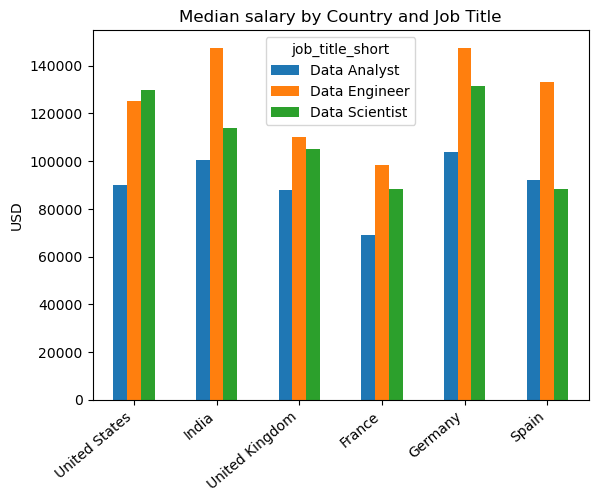

In [39]:
df_median_salary_job_country.plot(kind ='bar')
plt.title('Median salary by Country and Job Title')
plt.xlabel('')
plt.ylabel('USD')
plt.xticks(rotation = 40, ha = 'right')
plt.show()

## INDEX MANAGEMENT

In [41]:
df.index

RangeIndex(start=0, stop=785741, step=1)

In [42]:
df.index.name = 'job_index'

In [47]:
df_vietnam = df[df['job_country'] == 'Vietnam']

In [49]:
df_vietnam.reset_index(inplace=True)

In [50]:
df_vietnam

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"['sql', 'nosql', 'python', 'r', 'scala', 'java...","{'analyst_tools': ['tableau'], 'libraries': ['..."
1,2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"['python', 'bash', 'powershell', 'aws', 'azure...","{'cloud': ['aws', 'azure'], 'other': ['git', '..."
2,3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"['java', 'hadoop', 'spark', 'unix', 'sap', 'ya...","{'analyst_tools': ['sap'], 'libraries': ['hado..."
3,3056,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"['sql', 'python', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
4,3541,Data Engineer,Data Engineer,"Da Nang, Hải Châu District, Da Nang, Vietnam",via Jobs.vn.indeed.com,Full-time and Part-time,False,Vietnam,2023-11-22 13:59:18,False,False,Vietnam,None,NaN,NaN,Vinova Pte. Ltd,"['bash', 'python', 'java', 'sql', 'postgresql'...","{'databases': ['postgresql', 'mysql', 'elastic..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,785253,Senior Data Analyst,Senior Data Analyst,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-11-27 06:47:04,False,False,Vietnam,None,NaN,NaN,MSC Vietnam,"['sql', 'java', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
2410,785380,Software Engineer,"Mlops Engineer Python, Linux","Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Trusting Social,"['python', 'c++', 'java', 'javascript', 'tenso...","{'libraries': ['tensorflow', 'pytorch', 'mxnet..."
2411,785382,Data Analyst,Data Analyst,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:14,True,False,Vietnam,None,NaN,NaN,Sutrix Solutions,"['sql', 'db2', 'oracle', 'aws', 'jira', 'confl...","{'async': ['jira', 'confluence'], 'cloud': ['o..."
2412,785607,Cloud Engineer,Cloud Services Solutions Engineer,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-01 06:30:51,False,False,Vietnam,None,NaN,NaN,Tek Experts,"['azure', 'aws', 'oracle', 'windows', 'linux']","{'cloud': ['azure', 'aws', 'oracle'], 'os': ['..."


In [51]:
df_vietnam.set_index('job_index', inplace = True)

In [52]:
df_vietnam

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"['sql', 'nosql', 'python', 'r', 'scala', 'java...","{'analyst_tools': ['tableau'], 'libraries': ['..."
2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"['python', 'bash', 'powershell', 'aws', 'azure...","{'cloud': ['aws', 'azure'], 'other': ['git', '..."
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"['java', 'hadoop', 'spark', 'unix', 'sap', 'ya...","{'analyst_tools': ['sap'], 'libraries': ['hado..."
3056,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"['sql', 'python', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
3541,Data Engineer,Data Engineer,"Da Nang, Hải Châu District, Da Nang, Vietnam",via Jobs.vn.indeed.com,Full-time and Part-time,False,Vietnam,2023-11-22 13:59:18,False,False,Vietnam,None,NaN,NaN,Vinova Pte. Ltd,"['bash', 'python', 'java', 'sql', 'postgresql'...","{'databases': ['postgresql', 'mysql', 'elastic..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785253,Senior Data Analyst,Senior Data Analyst,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-11-27 06:47:04,False,False,Vietnam,None,NaN,NaN,MSC Vietnam,"['sql', 'java', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785380,Software Engineer,"Mlops Engineer Python, Linux","Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Trusting Social,"['python', 'c++', 'java', 'javascript', 'tenso...","{'libraries': ['tensorflow', 'pytorch', 'mxnet..."
785382,Data Analyst,Data Analyst,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:14,True,False,Vietnam,None,NaN,NaN,Sutrix Solutions,"['sql', 'db2', 'oracle', 'aws', 'jira', 'confl...","{'async': ['jira', 'confluence'], 'cloud': ['o..."
